# Reto Kaggle

In [1]:
#from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#drive.mount('/content/drive', force_remount=True)

## Data Exploration and Preprocessing

> ### Lectura de dataset

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/mau-JS/databases/main/test.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/mau-JS/databases/main/train.csv')

> ### Guardado en dataframe de la dataset

In [4]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.dropna(subset=['Survived'], inplace=True)
df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
418,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
419,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
420,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
421,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
422,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


### Columns description

1. Pclass: ticket class (first class, second class and third class)
2. SibSp: If the passenger has siblings or spouse.
3. Parch: Number of
4. Fare: Ticket price

In terms of the data analysis some columns must be deleted from the dataframe to avoid using unecessary information

In [5]:
# In this case cabin will be included to make an easy aproach but it could be usefull in the future
columns_to_delete = ['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin']
df = df.drop(columns_to_delete, axis=1)
#Encoding Gender in our Sex column
df['Sex'] = df['Sex'].replace(['male', 'female'], [1, 0])
X = df.drop('Survived',axis = 1)
y = df['Survived']
y

418     0.0
419     1.0
420     1.0
421     1.0
422     0.0
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 891, dtype: float64

> ### Data Exploration

In [6]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
418,3,1,22.0,1,0,7.2500,0.0
419,1,0,38.0,1,0,71.2833,1.0
420,3,0,26.0,0,0,7.9250,1.0
421,1,0,35.0,1,0,53.1000,1.0
422,3,1,35.0,0,0,8.0500,0.0


In [7]:
df.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
1304,2,1,27.0,0,0,13.00,0.0
1305,1,0,19.0,0,0,30.00,1.0
1306,3,0,NaN,1,2,23.45,0.0
1307,1,1,26.0,0,0,30.00,1.0
1308,3,1,32.0,0,0,7.75,0.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


In [9]:
#Shape gives us the amount of rows and features
df.shape

(891, 7)

Pclass has 0 missing values
Sex has 0 missing values
Age has 177 missing values
SibSp has 0 missing values
Parch has 0 missing values
Fare has 0 missing values


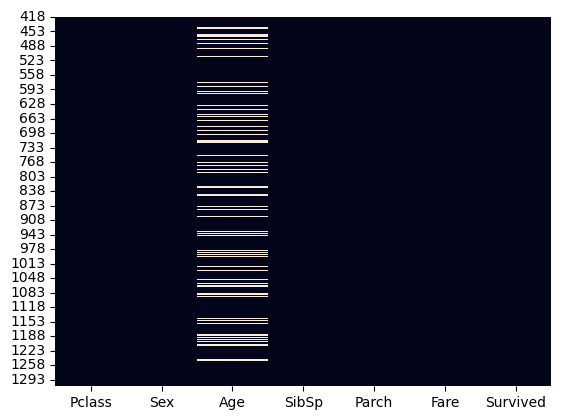

In [10]:
#Visualizing missing data
sns.heatmap(df.isnull(), cbar=False)

#Checking missing values for Pclass
missing_values = df['Pclass'].isna()
print(f'Pclass has {missing_values.sum()} missing values')

#Checking missing values for Sex
missing_values = df['Sex'].isna()
print(f'Sex has {missing_values.sum()} missing values')

#Checking missing values for Age
missing_values = df['Age'].isna()
print(f'Age has {missing_values.sum()} missing values')

#Checking missing values for Sibsp
missing_values = df['SibSp'].isna()
print(f'SibSp has {missing_values.sum()} missing values')

#Checking missing values for Parch
missing_values = df['Parch'].isna()
print(f'Parch has {missing_values.sum()} missing values')

#Checking missing values for Fare
missing_values = df['Fare'].isna()
print(f'Fare has {missing_values.sum()} missing values')

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X)
X_imputed = imputer.transform(X)
X = pd.DataFrame(X_imputed)
df = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
df.rename(columns={0: 'Pclass', 1: 'Sex', 2: 'Age',3:'SibSp',4:'Parch',5:'Fare'}, inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,1.0
888,3.0,0.0,28.0,1.0,2.0,23.4500,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0


---

### Check for outliers

First let's check the boxplots for the columns that columns that we think may have outliers that have a significant impact in the predictions.

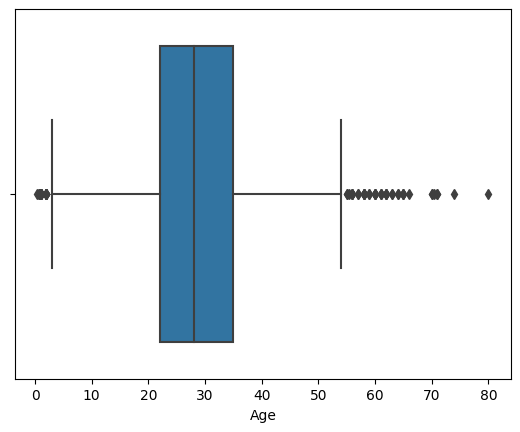

In [12]:
# Search for outliers
sns.boxplot(x=df['Age'])
plt.show()

<Axes: xlabel='Fare'>

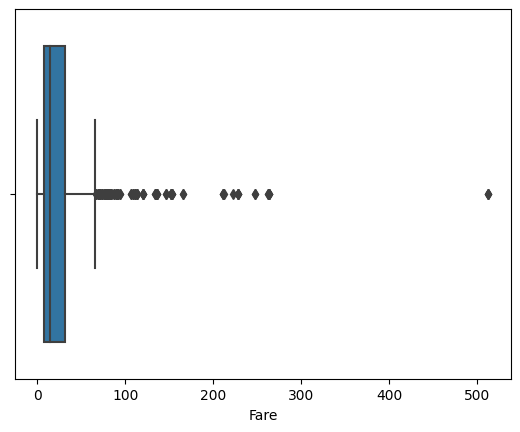

In [13]:
# Search for outliers
sns.boxplot(x=df['Fare'])

The boxplots show that there are outliers in the those columns.

In [14]:
# Function that computes the IQR
def outlier_thresholds(df, col_name):
    data_qtles = df.describe()
    q1 = data_qtles[col_name]['25%']
    q3 = data_qtles[col_name]['75%']
    IQR = q3-q1
    up_limit = q3 + 1.5*IQR
    low_limit = q1 - 1.5*IQR
    return low_limit, up_limit

In [15]:
# Print all the thresholds for all the columns in the dataset
df
columns = ['Age','Fare']
for i in columns:
    print(f"Thresholds in column {i}: {outlier_thresholds(df,i)}")

Thresholds in column Age: (2.5, 54.5)
Thresholds in column Fare: (-26.724, 65.6344)


In [16]:
low, up = outlier_thresholds(df, "Age")
'''
Use the limits to filter all the rows in the diabetes dataframe where the values in the Pregnancies column
are lower that the low limit and higher than the up limit, selecting the outliers in that column.
'''

# Filter rows
df = df[(df['Age'] >= low) & (df['Age'] <= up)]

In [17]:
low, up = outlier_thresholds(df, "Fare")
# Filter rows
df = df[(df['Fare'] >= low) & (df['Fare'] <= up)]

In [18]:
# Show the dataframe without outliers in the Fare and Age columns
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0
5,3.0,1.0,28.0,0.0,0.0,8.4583,0.0
...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,1.0
888,3.0,0.0,28.0,1.0,2.0,23.4500,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0


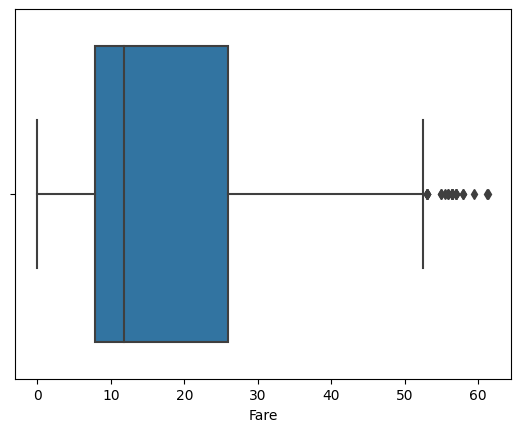

In [19]:
sns.boxplot(x=df['Fare'])
plt.show()

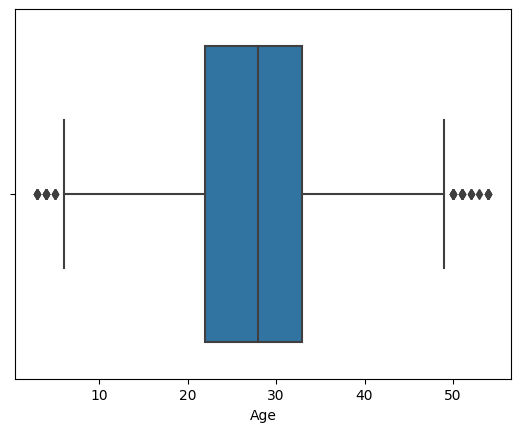

In [20]:
sns.boxplot(x=df['Age'])
plt.show()

As we can see the boxplots now have a better shape and less outliers due to the IQR.

---

### Correlation Matrix

In [21]:
correlation_matrix = df.corr()
print(correlation_matrix)

            Pclass       Sex       Age     SibSp     Parch      Fare  Survived
Pclass    1.000000  0.047501 -0.304298  0.081530  0.072351 -0.594245 -0.268318
Sex       0.047501  1.000000  0.095778 -0.154852 -0.290666 -0.158140 -0.509660
Age      -0.304298  0.095778  1.000000 -0.287650 -0.129590  0.098611 -0.063606
SibSp     0.081530 -0.154852 -0.287650  1.000000  0.392197  0.376443  0.002503
Parch     0.072351 -0.290666 -0.129590  0.392197  1.000000  0.320864  0.070732
Fare     -0.594245 -0.158140  0.098611  0.376443  0.320864  1.000000  0.247519
Survived -0.268318 -0.509660 -0.063606  0.002503  0.070732  0.247519  1.000000


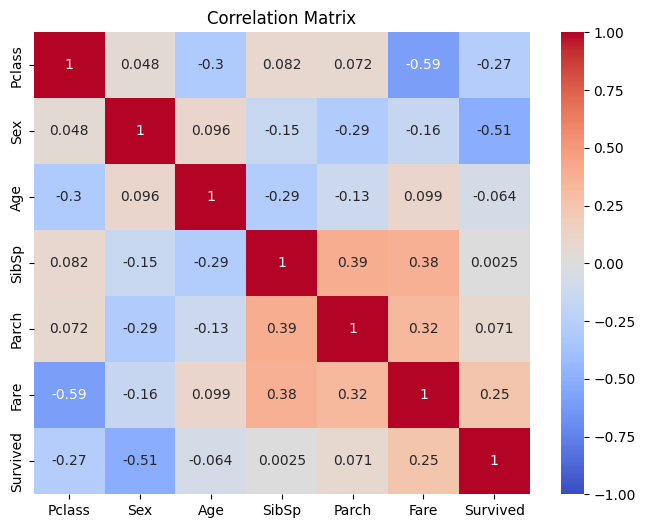

In [22]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Identifying unbalanced datasets

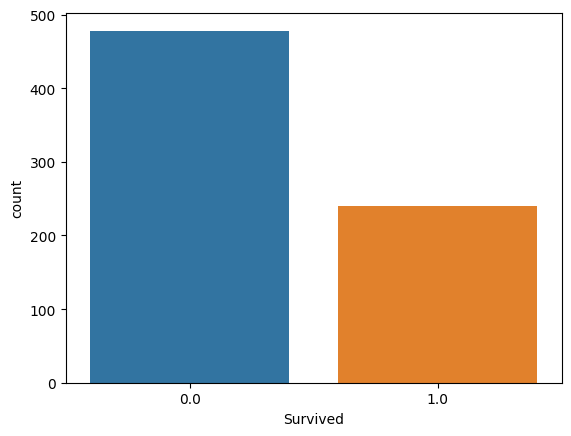

In [23]:
#Survived histogram visualization for identifying unbalanced datasets.
sns.countplot(x=df['Survived'])
plt.show()

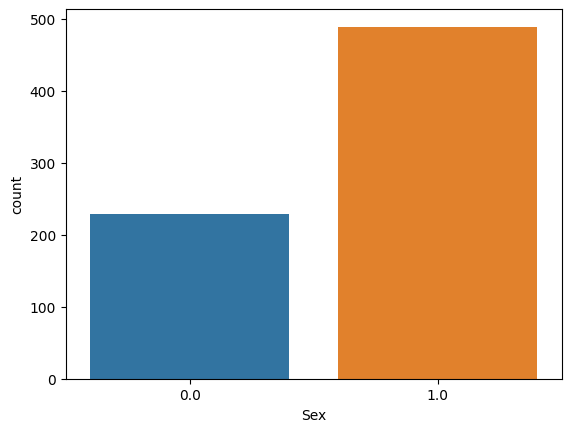

In [24]:
#Sex histogram visualization
sns.countplot(x=df['Sex'])
plt.show()

#### Scaling the data

This is useful to work with algorithms that are sensitive to the scale of the data like svm or linear regression.

In [25]:
from sklearn.preprocessing import StandardScaler
X = df.drop('Survived', axis = 1)
y = df['Survived']
scaler = StandardScaler()
#Scaling the fare data to work with k neighbors, support vector machines and logistic regression.
feature = df['Fare']
scaled_feature = scaler.fit_transform(feature.values.reshape(-1,1))
df['Fare'] = scaled_feature

#Scaling the age data to work with k neighbors, support vector machines and logistic regression.
feature2 = df['Age']
scaled_feature2 = scaler.fit_transform(feature2.values.reshape(-1,1))
df['Age'] = scaled_feature2
#For predictions we need to transform back:
#original_feature = scaler.inverse_transform(scaled_feature)

### **Checking if our dataset is balanced**
#### 'Survived' column is our main interest, as such we will check if the data on this column is balanced.

In [26]:
class_counts = df['Survived'].value_counts()
print(class_counts)

Survived
0.0    478
1.0    240
Name: count, dtype: int64


#### Our dataset is not balanced, therefore we will apply oversampling to balance our dataset.

In [ ]:
!pip install imblearn

---

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
#This is our training data with oversampling
X_train, y_train = ros.fit_resample(X_train, y_train)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,-0.207827,2.0,0.0,-0.644543
1,1.0,1.0,0.891580,1.0,1.0,2.671722
2,3.0,1.0,-0.007934,1.0,0.0,-0.101487
3,1.0,1.0,1.891041,0.0,0.0,0.634236
4,1.0,1.0,1.191419,0.0,0.0,0.795419
...,...,...,...,...,...,...
761,1.0,1.0,0.391850,0.0,0.0,1.005403
762,3.0,0.0,-0.007934,0.0,0.0,-0.753154
763,2.0,0.0,-1.007395,0.0,1.0,0.438736
764,3.0,0.0,-0.207827,0.0,0.0,-0.700265


## Apply ML Models

In [31]:
#We use updated X_train, y_train, x_test, y_test for machine learning
#Random forest, Logistic Regression(Mike), K neighbors(Mauricio), Support Vectors(Alfredo)

### Logistic Regression

In [32]:
# Import relevant libraries for the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Instance the model and train it
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions of the data
y_pred = logreg_model.predict(X_test)

In [35]:
# Obtain relevant metrics from the test and predictions results
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7708333333333334
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82        95
         1.0       0.63      0.78      0.70        49

    accuracy                           0.77       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.77      0.78       144



> #### K - cross validation

In [36]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(logreg_model, X, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.75694444 0.76388889 0.77777778 0.77622378 0.81818182]
Mean Accuracy: 0.78
Standard Deviation: 0.02


> #### ROC curve and AUC score

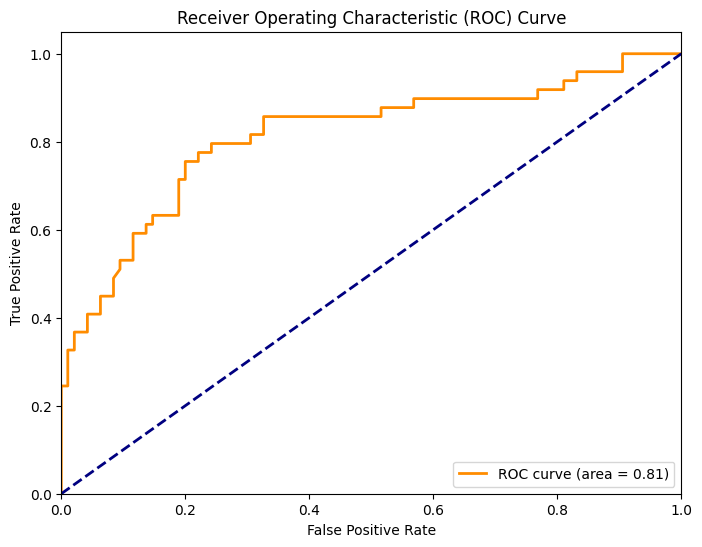

AUC Score: 0.81


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Make probability predictions on the test data
y_pred_prob = logreg_model  .predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc:.2f}")


In [38]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(logreg_model, X, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.75694444 0.76388889 0.77777778 0.77622378 0.81818182]
Mean Accuracy: 0.78
Standard Deviation: 0.02


In [39]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(logreg_model, X, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.75694444 0.76388889 0.77777778 0.77622378 0.81818182]
Mean Accuracy: 0.78
Standard Deviation: 0.02


> #### Confusion Matrix

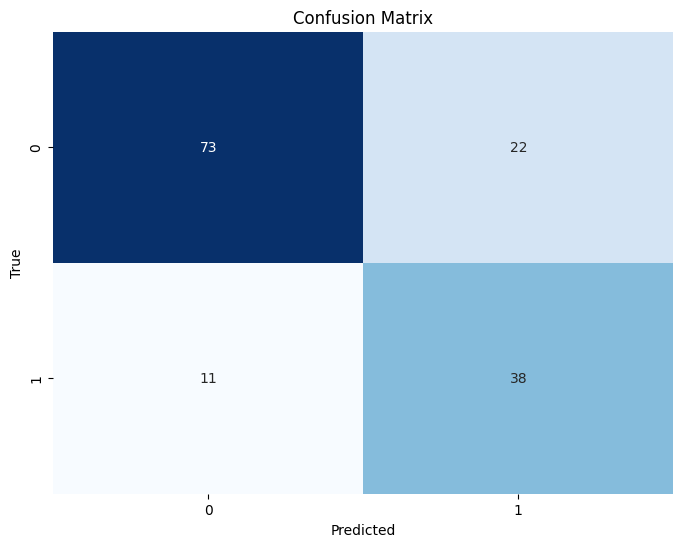

In [40]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### K neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
#Creating our KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
#Fitting our classifier to our data
knn.fit(X_train,y_train)
#Making predictions
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred)
report_knn = classification_report(y_test, y_pred)
#Printing our acuraccy results
print(f'KNN Acuraccy: {accuracy_knn}')
print(f'KNN Classification Report: {report_knn}')

KNN Acuraccy: 0.8194444444444444
KNN Classification Report:               precision    recall  f1-score   support

         0.0       0.87      0.77      0.82        95
         1.0       0.63      0.78      0.70        49

    accuracy                           0.77       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.77      0.78       144



> ### K neighbors ->  K - cross Validation

In [42]:
#Performing cross validation
k = 5
scores_knn = cross_val_score(knn,X,y,cv=k)

#Printing knn cross-validation scores
print('KNN Cross-validation scores', scores)

#Calculating and printing mean acuraccy and standar deviation
mean_accuracy_knn = scores_knn.mean()
std_deviation_knn = scores_knn.std()
print(f'KNN Mean Acuraccy: {mean_accuracy_knn:.2f}')
print(f'KNN Standard Deviation: {std_deviation:.2f}')

KNN Cross-validation scores [0.75694444 0.76388889 0.77777778 0.77622378 0.81818182]
KNN Mean Acuraccy: 0.79
KNN Standard Deviation: 0.02


> #### ROC Curve and AUC score for KNN

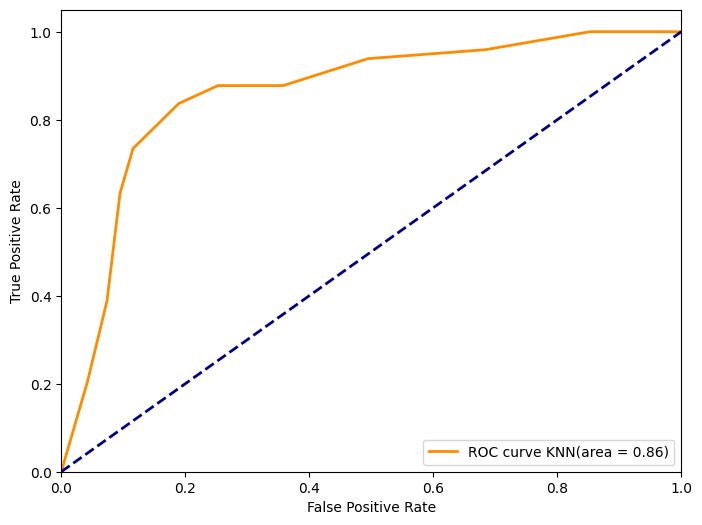

AUC Score KNN: 0.86


In [43]:
#Probability predictions on test data with knn
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
#Computing the ROC and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_knn)
roc_auc_knn = auc(fpr,tpr)

#Plotting the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color = 'darkorange', lw = 2, label = 'ROC curve KNN(area = {:.2f})'.format(roc_auc_knn))
plt.plot([0,1],[0,1],color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title = ('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()
print(f'AUC Score KNN: {roc_auc_knn:.2f}')

### Support Vector Classifier

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(random_state=42, probability=True)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Calculate classification report
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report: {report}")

Accuracy: 0.8055555555555556
Classification report:               precision    recall  f1-score   support

         0.0       0.90      0.79      0.84        95
         1.0       0.67      0.84      0.75        49

    accuracy                           0.81       144
   macro avg       0.79      0.81      0.79       144
weighted avg       0.82      0.81      0.81       144



#### Support Vector Classifier -> -cross validationS

In [45]:
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(svm_classifier, X_train, y_train, cv=k, scoring='accuracy')

print('Cross validation scores', scores)
# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross validation scores [0.80519481 0.83006536 0.77777778 0.79084967 0.78431373]
Cross-validation scores: [0.80519481 0.83006536 0.77777778 0.79084967 0.78431373]
Mean Accuracy: 0.80
Standard Deviation: 0.02


#### Support Vector Classifier -> ROC curve and AUC score

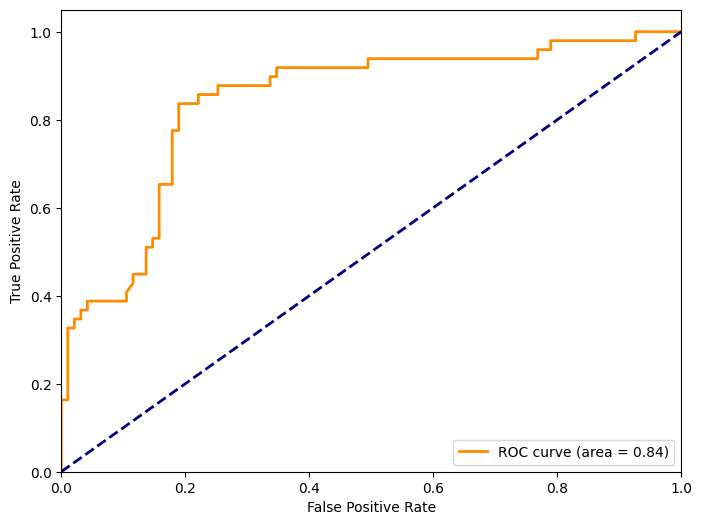

AUC Score: 0.84


In [57]:
# Make probability predictions on the test data
y_pred_probability = svm_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [59]:
accuracy_random_forest = accuracy_score(y_test, y_pred)
confusion_random_forest = confusion_matrix(y_test, y_pred)
report_random_forest = classification_report(y_test, y_pred)

In [60]:
print(f"Accuracy: {accuracy_random_forest}")
print(f"Classification Report:\n{report_random_forest}")

Accuracy: 0.8055555555555556
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84        95
         1.0       0.67      0.84      0.75        49

    accuracy                           0.81       144
   macro avg       0.79      0.81      0.79       144
weighted avg       0.82      0.81      0.81       144



> #### K - Cross Validation

In [61]:
k = 10
scores = cross_val_score(random_forest, X_train, y_train, cv=k, scoring='accuracy')
print('Cross validation scores Random Forest:', scores)
print("Cross-validation scores:", scores)

Cross validation scores Random Forest: [0.87012987 0.83116883 0.84415584 0.8961039  0.8961039  0.92207792
 0.81578947 0.92105263 0.89473684 0.80263158]
Cross-validation scores: [0.87012987 0.83116883 0.84415584 0.8961039  0.8961039  0.92207792
 0.81578947 0.92105263 0.89473684 0.80263158]


In [62]:
mean_accuracy_rf = scores.mean()
std_deviation_rf = scores.std()
print(f"Mean Accuracy: {mean_accuracy_rf:.2f}")
print(f"Standard Deviation: {std_deviation_rf:.2f}")

Mean Accuracy: 0.87
Standard Deviation: 0.04


> ### AUC & ROC Curve

In [63]:
y_pred_prob_rf = random_forest.predict_proba(X_test)[:, 1]

In [64]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

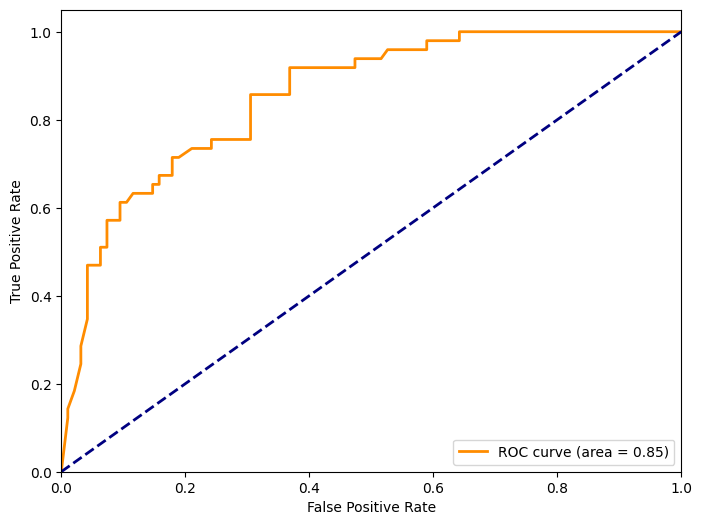

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [66]:
print(f"AUC Score: {roc_auc_rf:.2f}")

AUC Score: 0.85


In [72]:
y_pred_prob_rf

array([0.34916667, 0.95      , 0.07      , 0.58      , 0.04      ,
       0.0225    , 0.        , 0.32      , 0.        , 0.86      ,
       0.6375    , 0.        , 0.01      , 0.11528571, 0.09      ,
       0.97      , 0.05      , 0.14      , 0.958     , 0.01      ,
       0.55919048, 0.29      , 0.97      , 0.30857143, 0.58466667,
       0.10466667, 0.56      , 0.        , 0.51      , 0.0504246 ,
       0.22      , 0.13183333, 0.03      , 0.04585714, 0.95      ,
       1.        , 0.16      , 0.2925    , 0.96      , 0.15069048,
       0.38545238, 0.92639286, 0.26      , 0.83833333, 0.87      ,
       0.57333333, 0.        , 0.59559524, 0.37070184, 0.88      ,
       0.0225    , 0.81      , 0.17069048, 0.2       , 0.01      ,
       0.18      , 0.        , 0.32      , 0.29833333, 0.77857143,
       0.12      , 0.62      , 0.86      , 0.        , 0.21      ,
       0.        , 0.98      , 1.        , 0.85      , 0.31825613,
       0.48      , 0.17      , 0.        , 0.11157143, 0.37070

> ### Confusion Matrix

In [73]:
threshold = 0.5
y_pred_rf = (y_pred_prob_rf > threshold).astype(int)

confusion_rf = confusion_matrix(y_test, y_pred_rf)


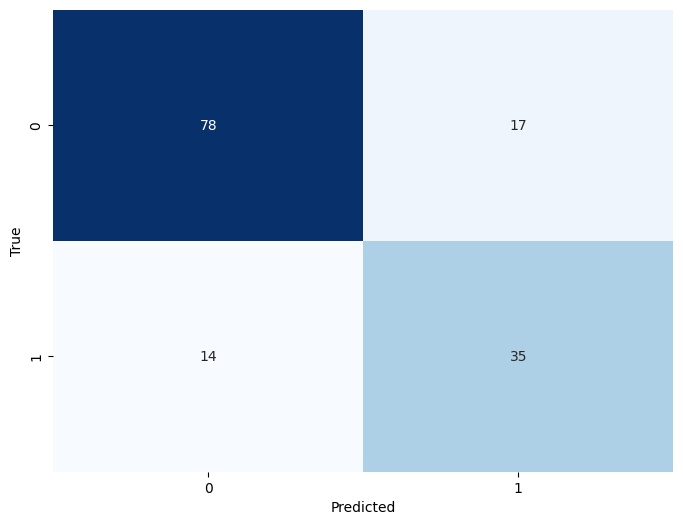

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()